In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!chmod 600 /root/.kaggle/kaggle.json

Dataset URL: https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
License(s): other
 90% 94.0M/105M [00:01<00:00, 78.5MB/s]
100% 105M/105M [00:01<00:00, 71.7MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cifake-real-and-ai-generated-synthetic-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout



In [5]:
import random
import os
from shutil import copyfile

source_dir = '/content/train/REAL'

# Path to the destination directory where selected files will be copied
destination_dir = '/content/train1/REAL'

# List all files in the source directory
files = os.listdir(source_dir)

# Shuffle the files randomly
random.shuffle(files)

# Number of files to select
num_files_to_select = 2500  # Adjust this number as needed

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the selected files to the destination directory
for file_name in files[:num_files_to_select]:
   source_file_path = os.path.join(source_dir, file_name)
   destination_file_path = os.path.join(destination_dir, file_name)
   copyfile(source_file_path, destination_file_path)


source_dir = '/content/train/FAKE'

# Path to the destination directory where selected files will be copied
destination_dir = '/content/train1/FAKE'

# List all files in the source directory
files = os.listdir(source_dir)

# Shuffle the files randomly
random.shuffle(files)

# Number of files to select
num_files_to_select = 2500  # Adjust this number as needed

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the selected files to the destination directory
for file_name in files[:num_files_to_select]:
   source_file_path = os.path.join(source_dir, file_name)
   destination_file_path = os.path.join(destination_dir, file_name)
   copyfile(source_file_path, destination_file_path)

source_dir = '/content/test/FAKE'

# Path to the destination directory where selected files will be copied
destination_dir = '/content/test1/FAKE'

# List all files in the source directory
files = os.listdir(source_dir)

# Shuffle the files randomly
random.shuffle(files)

# Number of files to select
num_files_to_select = 500  # Adjust this number as needed

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the selected files to the destination directory
for file_name in files[:num_files_to_select]:
   source_file_path = os.path.join(source_dir, file_name)
   destination_file_path = os.path.join(destination_dir, file_name)
   copyfile(source_file_path, destination_file_path)
source_dir = '/content/test/REAL'

# Path to the destination directory where selected files will be copied
destination_dir = '/content/test1/REAL'

# List all files in the source directory
files = os.listdir(source_dir)

# Shuffle the files randomly
random.shuffle(files)

# Number of files to select
num_files_to_select = 500  # Adjust this number as needed

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the selected files to the destination directory
for file_name in files[:num_files_to_select]:
   source_file_path = os.path.join(source_dir, file_name)
   destination_file_path = os.path.join(destination_dir, file_name)
   copyfile(source_file_path, destination_file_path)


In [6]:
train_ds = keras.utils.image_dataset_from_directory(
   directory = '/content/train1',
   labels='inferred',
   label_mode = 'int',
   batch_size=32,
   image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
   directory = '/content/test1',
   labels='inferred',
   label_mode = 'int',
   batch_size=32,
   image_size=(256,256)
)


Found 5000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
157/157 [==============================] - 23s 85ms/step - loss: 14.4985 - accuracy: 0.6258 - val_loss: 0.6861 - val_accuracy: 0.7080
Epoch 2/5
157/157 [==============================] - 13s 78ms/step - loss: 0.6030 - accuracy: 0.6956 - val_loss: 0.5868 - val_accuracy: 0.7140
Epoch 3/5
157/157 [==============================] - 13s 78ms/step - loss: 0.5335 - accuracy: 0.7398 - val_loss: 0.7365 - val_accuracy: 0.6790
Epoch 4/5
157/157 [==============================] - 12s 78ms/step - loss: 0.4529 - accuracy: 0.7880 - val_loss: 0.8042 - val_accuracy: 0.6900
Epoch 5/5
157/157 [==============================] - 11s 72ms/step - loss: 0.3645 - accuracy: 0.8412 - val_loss: 0.9803 - val_accuracy: 0.7020


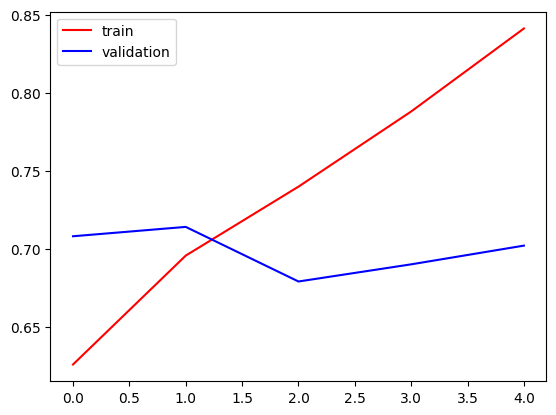

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


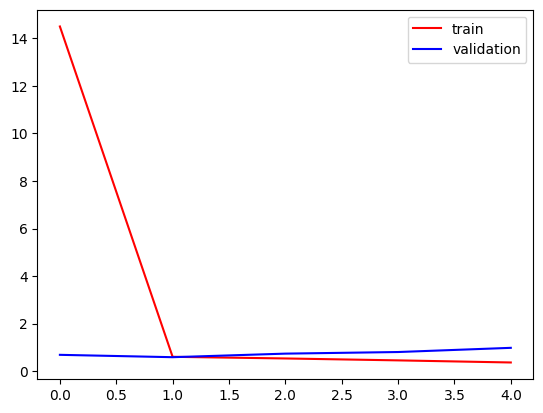

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
157/157 [==============================] - 19s 97ms/step - loss: 2.8814 - accuracy: 0.7068 - val_loss: 4.7747 - val_accuracy: 0.6330
Epoch 2/5
157/157 [==============================] - 15s 96ms/step - loss: 1.1188 - accuracy: 0.7322 - val_loss: 0.9035 - val_accuracy: 0.6860
Epoch 3/5
157/157 [==============================] - 15s 96ms/step - loss: 0.5310 - accuracy: 0.7856 - val_loss: 0.5103 - val_accuracy: 0.7970
Epoch 4/5
157/157 [==============================] - 15s 97ms/step - loss: 0.4235 - accuracy: 0.8366 - val_loss: 0.4940 - val_accuracy: 0.7950
Epoch 5/5
157/157 [==============================] - 15s 96ms/step - loss: 0.3466 - accuracy: 0.8600 - val_loss: 0.4472 - val_accuracy: 0.8340


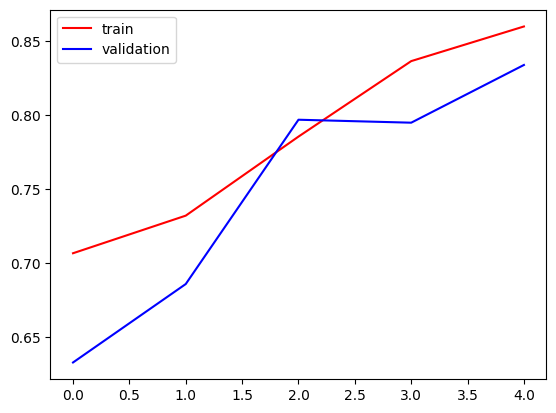

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


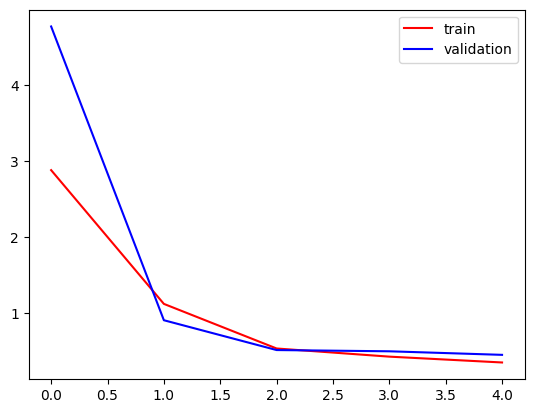

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Define data augmentation parameters
datagen = ImageDataGenerator(
   rotation_range=10,      # Rotate images randomly by up to 10 degrees
   width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
   height_shift_range=0.1, # Shift images vertically by up to 10% of the height
   shear_range=0.1,        # Shear images by up to 10%
   zoom_range=0.1,         # Zoom in/out on images by up to 10%
   horizontal_flip=True,   # Flip images horizontally
   vertical_flip=True,     # Flip images vertically
   fill_mode='nearest',

)

# Flow training images in batches of 32 using data augmentation
train_generator = datagen.flow_from_directory(
   directory='/content/train1',
   target_size=(256, 256),
   batch_size=32,
   class_mode='binary',

)

# Flow validation images in batches of 32 without data augmentation
validation_generator = ImageDataGenerator().flow_from_directory(
   directory='/content/test1', # Path to the directory containing validation images
   target_size=(256, 256),               # Resize images to 256x256
   batch_size=32,                        # Batch size
   class_mode='binary',

)


Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit_generator(train_generator,epochs=8,validation_data=validation_generator)

<ipython-input-23-b8cc647bb472>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=8,validation_data=validation_generator)


Epoch 1/8
157/157 [==============================] - 81s 495ms/step - loss: 3.0434 - accuracy: 0.6910 - val_loss: 2.1879 - val_accuracy: 0.6570
Epoch 2/8
157/157 [==============================] - 78s 499ms/step - loss: 1.1317 - accuracy: 0.7202 - val_loss: 0.7683 - val_accuracy: 0.7550
Epoch 3/8
157/157 [==============================] - 85s 543ms/step - loss: 0.6366 - accuracy: 0.7582 - val_loss: 0.5197 - val_accuracy: 0.7740
Epoch 4/8
157/157 [==============================] - 78s 493ms/step - loss: 0.4742 - accuracy: 0.7966 - val_loss: 0.4249 - val_accuracy: 0.8030
Epoch 5/8
157/157 [==============================] - 78s 496ms/step - loss: 0.4175 - accuracy: 0.8114 - val_loss: 0.5872 - val_accuracy: 0.7510
Epoch 6/8
157/157 [==============================] - 79s 502ms/step - loss: 0.3929 - accuracy: 0.8280 - val_loss: 0.3745 - val_accuracy: 0.8560
Epoch 7/8
157/157 [==============================] - 77s 494ms/step - loss: 0.3703 - accuracy: 0.8394 - val_loss: 0.3894 - val_accuracy:

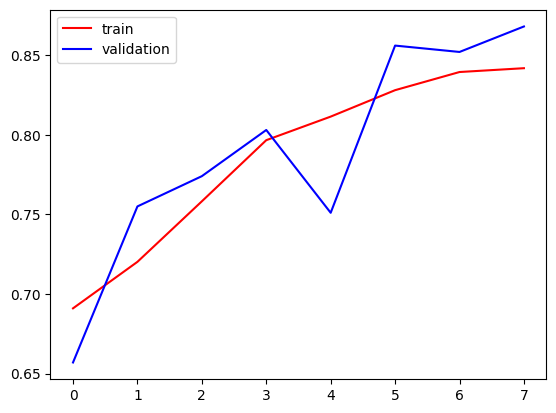

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

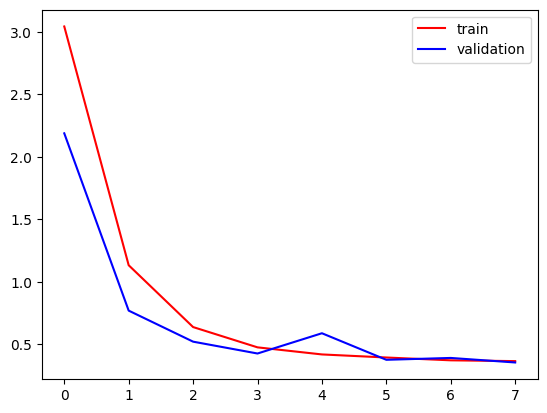

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
true_labels = validation_generator.classes

# Make predictions on the validation set
predictions = model.predict_generator(validation_generator)
predicted_labels = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Generate classification report
print(classification_report(true_labels, predicted_labels))

<ipython-input-26-6be4ffb7fd5c>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(validation_generator)


              precision    recall  f1-score   support

           0       0.51      0.53      0.52       500
           1       0.51      0.50      0.51       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



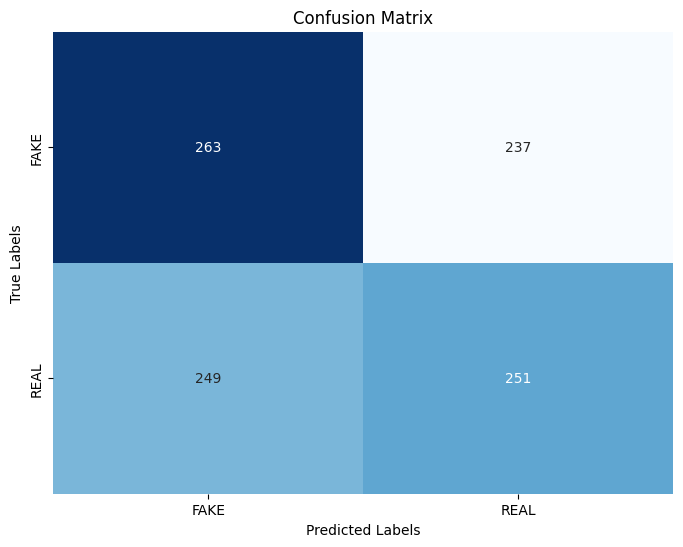

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_labels = list(validation_generator.class_indices.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=validation_generator.class_indices,
            yticklabels=validation_generator.class_indices)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()